# Analysis of Harvey flooding

Estimation of water input to Galveston Bay due to Hurricane Harvey precipitation.

In [290]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.dates import date2num
import numpy as np
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import os
from collections import OrderedDict
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

In [291]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])
pc = cartopy.crs.PlateCarree()
merc = cartopy.crs.Mercator(central_longitude=-85.0)

plots = {'Water Level [m]': {'color': 'r', 'marker': 'o', 'ms': 10, 'alpha': 0.5}, 
         'WaterT [deg C]': {'color': 'b', 'marker': '.', 'ms': 10, 'alpha': 0.5}, 
         'Depth [m]': {'color': 'r', 'marker': 'o', 'ms': 10, 'alpha': 0.5},  
         'East [m/s]': {'color': 'g', 'marker': '>', 'ms': 10, 'alpha': 0.25}, 
         'North [m/s]': {'color': 'g', 'marker': '>', 'ms': 10, 'alpha': 0.25}, 
         'Salinity': {'color': 'k', 'marker': '*', 'ms': 10, 'alpha': 0.5}, 
         'Along [cm/s]': {'color': 'darkcyan', 'marker': '^', 'ms': 10, 'alpha': 0.5},
         'Across [cm/s]': {'color': 'darkcyan', 'marker': '^', 'ms': 10, 'alpha': 0.5}}

base = 'drive_data/'

In [292]:
# read in buoy info
bys = pd.read_csv(base + 'buoys.csv', index_col=0).to_dict('index')

buoys = {'BOLI': {'ll': ([-94.783, 29.342]), 'color': '#689F38', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'MIDG': {'ll': ([-94.875, 29.508]),  'color': '#FBC02D', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'FISH': {'ll': ([-94.854, 29.670]),  'color': '#F57C00', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'TRIN': {'ll': ([-94.746, 29.661]),  'color': '#FFA000', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'OLDR': {'ll': ([-94.783, 29.833]), 'color': '#D32F2F', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         '8771486': {'ll': ([bys['8771486']['lon'], bys['8771486']['lat']]),  'color': '#0097A7',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770613': {'ll': ([bys['8770613']['lon'], bys['8770613']['lat']]),  'color': '#E64A19',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity']},
         '8771013': {'ll': ([bys['8771013']['lon'], bys['8771013']['lat']]), 'color': '#AFB42B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity']},
         '8771341': {'ll': ([bys['8771341']['lon'], bys['8771341']['lat']]), 'color': '#388E3C',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]',
                             'AtmPr [MB]']},
         '8771450': {'ll': ([bys['8771450']['lon'], bys['8771450']['lat']]), 'color': '#00796B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]',
                             'AtmPr [MB]']},
         'B': {'ll': ([bys['B']['lon'], bys['B']['lat']]), 'color': '#303F9F',
                     'vars': ['AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity', 'Along [cm/s]', 'Across [cm/s]']},
         'g06010': {'ll': ([bys['g06010']['lon'], bys['g06010']['lat']]), 'color': '#388E3C',
                     'vars': ['Along [cm/s]', 'Across [cm/s]']},
         '42035': {'ll': ([bys['42035']['lon'], bys['42035']['lat']]), 'color': '#5D4037',
                     'vars': ['AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770808': {'ll': ([bys['8770808']['lon'], bys['8770808']['lat']]), 'color': '#512DA8',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770777': {'ll': ([bys['8770777']['lon'], bys['8770777']['lat']]), 'color': '#C2185B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770822': {'ll': ([bys['8770822']['lon'], bys['8770822']['lat']]), 'color': '#455A64',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770971': {'ll': ([bys['8770971']['lon'], bys['8770971']['lat']]), 'color': '#7B1FA2',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8771972': {'ll': ([bys['8771972']['lon'], bys['8771972']['lat']]), 'color': '#0288D1',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']}
        }


buoys_ordered = ['8770777', '8770613', 'OLDR', 'FISH', 'TRIN', 'MIDG', '8771013', 'BOLI', 'g06010', '8771341',
                '8771450', '8771486', '8771972', '8770971', '8770808', 'B', '42035', '8770822']
# buoys down main bay
buoys_main = ['8770613', 'FISH', 'TRIN', 'MIDG', '8771013', 'BOLI', 'g06010', '8771341', '8771450']
# buoys used in analysis
buoys_used = ['MIDG', '8771013', 'g06010', 'BOLI', '8771486', '8771341', '8770613', '8771972']

In [293]:
# See make_data notebook. This reads in data from many sources, recalculates so that all data is hourly by taking 
# hourly averages, and shifts water levels to all be mean high water to match the bathymetry.
df = pd.read_csv(base + 'data.csv', parse_dates=True, index_col=0)

dstart = '2017-06-01'; dend = '2017-12-31'

In [294]:
# read in bathymetry data, as calculated in notebook `bathy`
d = np.load(base + 'bathy_galv_clean.npz')  # all of Galveston Bay
bathy = d['bathy']; dx = d['dx']; dy = d['dy']; lon = d['lon']; lat = d['lat']
bathyw = np.load(base + 'bathy_galv_west.npz')['bathy']  # West Bay
bathym = np.load(base + 'bathy_galv_main.npz')['bathy']  # Rest of Galveston Bay
bathyo = np.load(base + 'bathy_every_fifth.npz')['bathy'][::-1,:][1:-1,1:-1]  # all
bathyo = np.ma.masked_where(bathyo>0, bathyo)

# Calculate shear at seabed in Galveston channel

Notes from [online course book](https://ocw.mit.edu/courses/earth-atmospheric-and-planetary-sciences/12-090-introduction-to-fluid-motions-sediment-transport-and-current-generated-sedimentary-structures-fall-2006/course-textbook/), chapter 4 on Flow in Channels. [number] refers to labeled paragraphs in book.

1. Calculate shear. From [9]:

    $ \tau_0 = g\rho d\sin \alpha, $ 
    
    where $\tau_0$ is the seabed shear stress, $\rho$ is the water density, $d$ is the depth, and $\alpha$ is the slope of in their case the seabed but in our case the sea surface.
    
1. Calculate friction velocity. From [63]:

    $ u_* = \sqrt{\tau_0/\rho} $
    
1. Calculate the Law of the wall for smooth boundaries. I don't know if we have a smooth boundary or not but I have no information about the seabed. From [102], we have for outside the viscous sublayer:

    $ u = u_* \left(2.5 \ln \frac{\rho u_* z}{\mu} + 5.1\right) $

## Do analysis in 2001 to be able to use 2 NOAA stations

In [7]:
# read in station data
# old station home page: https://tidesandcurrents.noaa.gov/stationhome.html?id=8771328
ll_1328 = [-(94+46.8/60), 29+21.9/60]
dstart = '20010301'; dend = '20010531'
station = '8771328'
url = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=hourly_height&application=NOS.COOPS.TAC.WL&begin_date=' + dstart + '&end_date=' + dend + '&datum=MHW&station=' + station + '&time_zone=GMT&units=metric&format=csv'
df2 = pd.read_csv(url, parse_dates=True, index_col=0, usecols=[0,1], header=0, names=['Dates [UTC]', station + ': Water Level [m]']).tz_localize('UTC')  # meters, MHW
station = '8771341'
url = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=hourly_height&application=NOS.COOPS.TAC.WL&begin_date=' + dstart + '&end_date=' + dend + '&datum=MHW&station=' + station + '&time_zone=GMT&units=metric&format=csv'
df2[station + ': Water Level [m]'] = pd.read_csv(url, parse_dates=True, index_col=0, usecols=[0,1]).tz_localize('UTC')  # meters, MHW

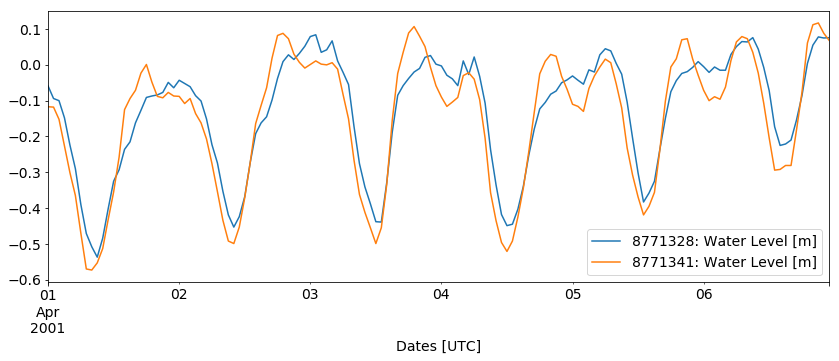

In [8]:
df2['2001-4-1':'2001-4-6'].plot(figsize=(14,5))

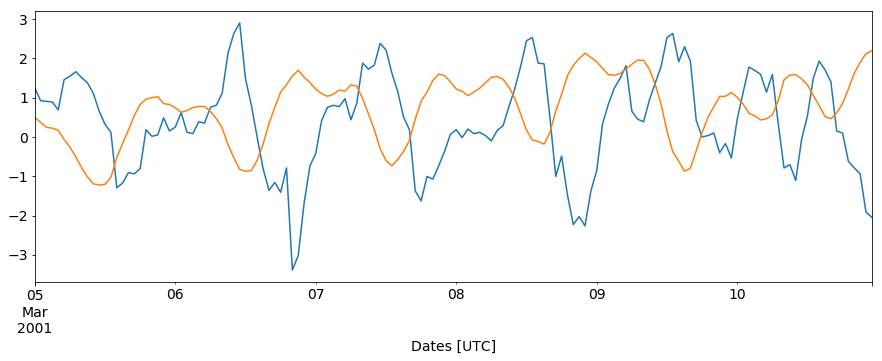

In [193]:
# calculate tau0
g = 9.81  # m/s^2
rho = 1025  # kg/m^3
l = 6000  # meters, distance between 8771328 and 8771341 (on a bend?)
d = 10  # meters, approximate average depth
eta1328 = df2['8771328: Water Level [m]']
eta1341 = df2['8771341: Water Level [m]']
O = eta1328 - eta1341
H = np.sqrt(O**2 + l**2)  # "hypoteneuse"

tau0 = g*rho*d*np.sin(O/H)
tau0['2001-3-5':'2001-3-10'].plot()
(eta1341*3+2)['2001-3-5':'2001-3-10'].plot(figsize=(15,5))

## Present Day

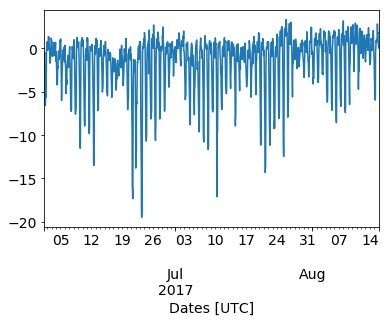

In [128]:
df['BOLI: Depth [m], median'] = df['BOLI: Depth [m]'].rolling(window=7, center=True).median()
g = 9.81

# calculate shear stress
l = 5200  # meters, along-channel length between BOLI and 8771341
d = 8  # meters, average depth
C = 2.6  # meters, vertical shift for BOLI to be on same datum as 8771341 --- made up
etaBOLI = df['BOLI: Depth [m], median'] - C  # corrected depth at BOLI - vertical shift
eta1341 = df['8771341: Water Level [m]']
O = etaBOLI - eta1341  # "opposite"
# O[:'2017-9-5'].plot()
H = np.sqrt(O**2 + l**2)  # "hypoteneuse"
tau0 = g*rho*d*np.sin(O/H)  # ebb is positive, flood is negative
tau0[:'2017-8-15'].plot()
# # tau0
# iebb = tau0 > 0
# iflood = tau0 <= 0
# tau0 = abs(tau0)
# tau0.loc[iflood].plot(color='b')
# tau0.loc[iebb].plot(color='r')
# # etaBOLI.plot()
# # eta1341.plot()
# uf = np.sqrt(tau0/rho)  # friction velocity
# # uf.plot()
# mu = 1.08e-3  # Pa s, dynamic viscosity
# z = np.linspace(0,12)  # backward in depth
# # rho[4]*uf[4]*z/mu
# u = (uf[800]*(2.5*np.log(rho[4]*uf[800]*z/mu) + 5.1))
# plt.plot(u,z)

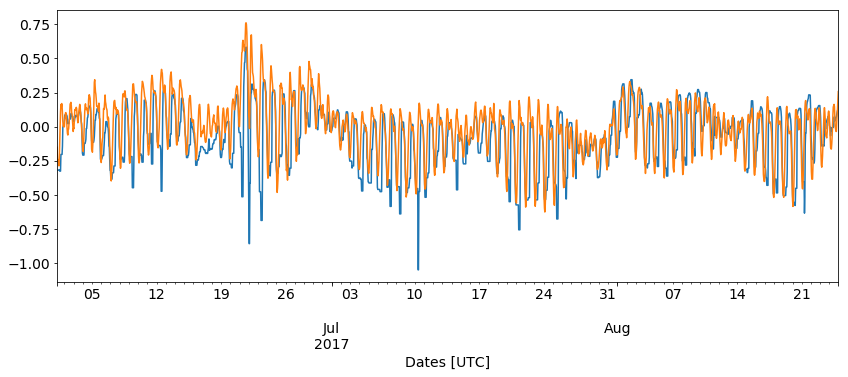

In [129]:
etaBOLI[:'2017-8-24'].plot()
eta1341[:'2017-8-24'].plot(figsize=(14,5))

### Present day velocity profiles


In [200]:
depths = np.unique([float(col.split('depth ')[1].split(' ')[0]) for col in df.columns if 'depth' in col])


In [242]:
from scipy.optimize import curve_fit
rho = 1000
mu = 1.08e-3  # Pa s, dynamic viscosity 1.08e-3 to 1.88e-3

def uprofile(z, uf):
    '''fit log profile .'''
    return uf * (2.5*np.log(rho * uf * z/mu) + 5.1)
#     return Sinf*(1-np.exp(-t/tau))



In [201]:
depths

array([  3.81,   4.79,   5.79,   6.8 ,   7.8 ,   8.81,   9.81,  10.79])

In [241]:
s

array([-1.98334143, -2.13369611, -2.05213611, -2.00404011, -1.93035449,
       -1.81577605, -1.56973539, -1.31912363])

In [248]:
z = np.linspace(0,12)

date = '2017-8-30 00:00'

# dates = [tau0.index[i]]
# dates = df.index
s = np.zeros(len(depths))
for j, depth in enumerate(depths):
    s[j] = df.loc[date,'g06010: Along [cm/s], depth %s [m]' % abs(depth)]/100

    
fit = curve_fit(uprofile, 12-depths, s, bounds=(0.01,4))
print(fit[0])  # fitted uf
data_fit = uprofile(depths[::-1], *fit[0])
# data_fit

[ 0.01]


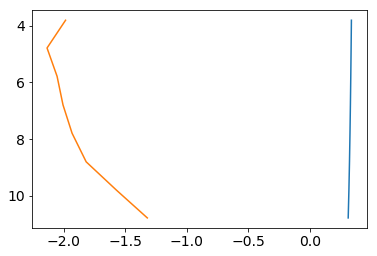

In [249]:
plt.plot(data_fit, depths)
plt.plot(s, depths)
plt.gca().invert_yaxis() 

In [496]:
depths = -np.unique([float(col.split('depth ')[1].split(' ')[0]) for col in df.columns if 'depth' in col])


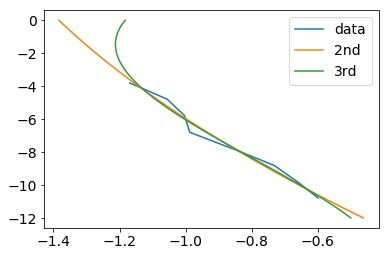

In [497]:
date = '2017-8-29 00:00'

# dates = [tau0.index[i]]
# dates = df.index
s = np.zeros(len(depths))
for j, depth in enumerate(depths):
    s[j] = df.loc[date,'g06010: Along [cm/s], depth %s [m]' % abs(depth)]/100

    
p2 = np.polyfit(depths, s, 2)
p3 = np.polyfit(depths, s, 3)
z = np.linspace(-12,0)
plt.plot(s, depths, label='data')
plt.plot(np.polyval(p2, z), z, label='2nd')
plt.plot(np.polyval(p3, z), z, label='3rd')
plt.legend()
# plt.gca().invert_yaxis() 

Calculate mean for each profile with top and bottom assumptions and see what depth the mean is at

In [499]:
depths = -np.unique([float(col.split('depth ')[1].split(' ')[0]) for col in df.columns if 'depth' in col])
depths = np.concatenate(([0], depths, [-12]))  # add 0 and 12
depths

array([  0.  ,  -3.81,  -4.79,  -5.79,  -6.8 ,  -7.8 ,  -8.81,  -9.81,
       -10.79, -12.  ])

In [563]:
dates = df.index
smean = np.zeros(dates.size)
zmean = np.zeros(dates.size)

for i, date in enumerate(dates):
# date = '2017-8-30 06:00'

    s = np.zeros(len(depths))
    for j, depth in enumerate(depths):
        if depth == 0:  # make top of water column constant
            s[j] = df.loc[date,'g06010: Along [cm/s], depth %s [m]' % abs(depths[j+1])]
        elif depth == -12:
            s[j] = s[j-1]/2
        else:
            s[j] = df.loc[date,'g06010: Along [cm/s], depth %s [m]' % abs(depth)]

    # interpolate to fill in water column evenly
    zint = np.linspace(-12, 0, 1000)  # depths
    sint = np.interp(zint, depths[::-1], s[::-1])  # interpolated speed to depths

    # plt.plot(sint, zint, 'k')
    # plt.plot(s, depths, 'ro')

    smean[i] = sint.mean()  # mean speed for profile
    zmean[i] = zint[abs(sint - sint.mean()).argmin()]  # depth at which mean occurs
df['smean'] = smean
df['zmean'] = zmean

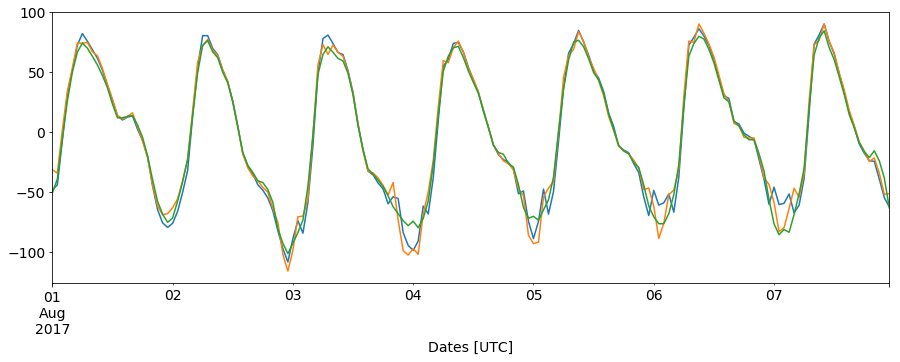

In [565]:
df['g06010: Along [cm/s], depth 5.79 [m]']['2017-8-1':'2017-8-7'].plot()
df['g06010: Along [cm/s], depth 6.8 [m]']['2017-8-1':'2017-8-7'].plot(figsize=(15,5))
df['smean']['2017-8-1':'2017-8-7'].plot(figsize=(15,5))


In [562]:
smean[1000]

-0.14960738679665878

In [185]:
date = '2017-8-29 00:00'

rho = 1000

# friction velocity
uf = abs(np.sqrt(abs(tau0)/rho))  # time series


mu = 1.88e-3  # Pa s, dynamic viscosity 1.08e-3 to 1.88e-3
z = np.linspace(0,12)  # backward in depth

# recreate velocity profiles
# i = 50


# u = np.sign(tau0.loc[date])*0.725*uf.loc[date] * (2.5*np.log(rho * 0.75*uf.loc[date] * z/mu) + 5.1)

uff = 
u = uff.loc[date] * (2.5*np.log(rho * uff.loc[date] * z/mu) + 5.1)

/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [186]:
dates = [tau0.index[i]]
# dates = df.index
s = np.zeros(len(depths))
for j, depth in enumerate(depths):
    s[j] = df.loc[date,'g06010: Along [cm/s], depth %s [m]' % abs(depth)]


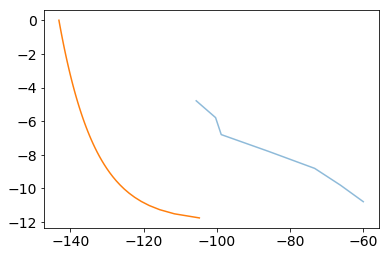

In [187]:
plt.plot(s[1:], depths[1:], '-', alpha=0.5)  # data
plt.plot(u*100,-(12-z))  # model


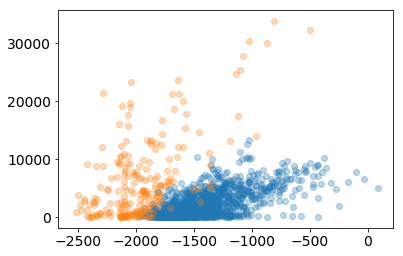

In [183]:
plt.scatter((df['8771341: AtmPr [MB]']-df['BOLI: Depth [m]']*1000)['2017-7-1':'2017-8-24'],(df['g06010: Along [cm/s], depth 9.81 [m]']**2)['2017-7-1':'2017-8-24'], alpha=0.3)
plt.scatter((df['8771341: AtmPr [MB]']-df['BOLI: Depth [m]']*1000)['2017-8-26':'2017-9-3'],(df['g06010: Along [cm/s], depth 9.81 [m]']**2)['2017-8-26':'2017-9-3'], alpha=0.3)

/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


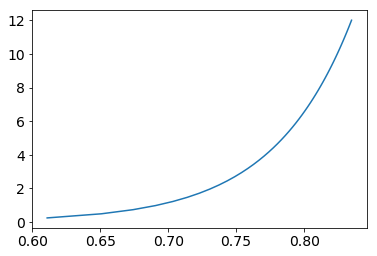

In [78]:
# calculate shear stress
l = 5200  # meters, along-channel length between BOLI and 8771341
d = 10  # meters, average depth
C = 2.7  # meters, vertical shift for BOLI to be on same datum as 8771341 --- made up
etaBOLI = BOLI - C  # corrected depth at BOLI - vertical shift
eta1341 = df['8771341: Water Level [m]']
O = etaBOLI - eta1341  # "opposite"
# O[:'2017-9-5'].plot()
# H = np.sqrt(O**2 + l**2)  # "hypoteneuse"
tau0 = g*rho*d*np.sin(O/H)  # ebb is positive, flood is negative
# tau0
iebb = tau0 > 0
iflood = tau0 <= 0
tau0 = abs(tau0)
# tau0.loc[iflood].plot(color='b')
# tau0.loc[iebb].plot(color='r')
# # etaBOLI.plot()
# # eta1341.plot()
uf = np.sqrt(tau0/rho)  # friction velocity
# uf.plot()
mu = 1.08e-3  # Pa s, dynamic viscosity
z = np.linspace(0,12)  # backward in depth
# rho[4]*uf[4]*z/mu
u = (uf[800]*(2.5*np.log(rho[4]*uf[800]*z/mu) + 5.1))
plt.plot(u,z)

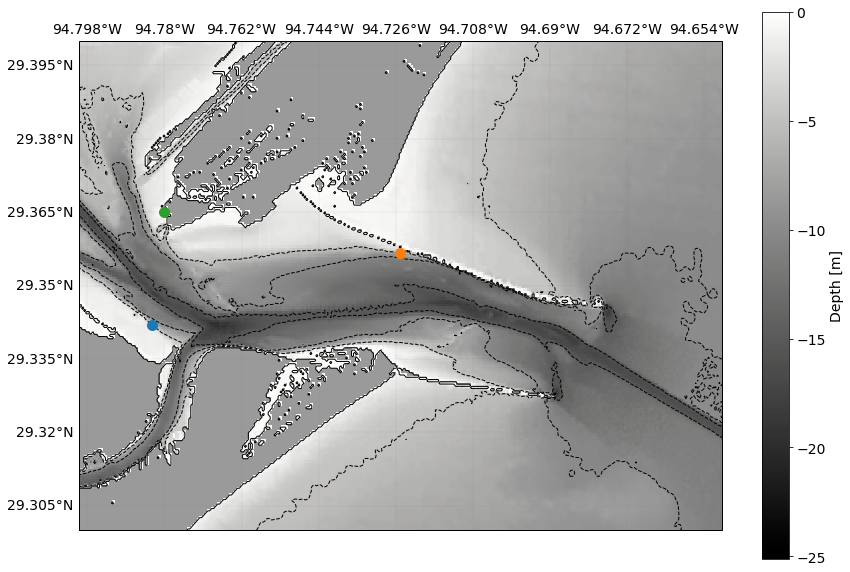

In [139]:
fig = plt.figure(figsize=(12, 8))# (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-94.8, -94.65, 29.3, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
# ax.add_feature(land_10m, facecolor='0.8')
# ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'
ax.set_facecolor('0.8')
ax.pcolormesh(lon, lat, bathyo.mask, cmap=cmo.gray_r, vmin=0, vmax=3, transform=pc)
mappable = ax.pcolormesh(lon, lat, bathyo, cmap=cmo.gray, transform=pc)
ax.contour(lon, lat, bathyo.mask, 1, colors='k', linewidths=1, transform=pc)  # coastline
ax.contour(lon, lat, bathyo, np.arange(-25,0,5), colors='k', linewidths=1, transform=pc)  # some values
cb = fig.colorbar(mappable)
cb.set_label('Depth [m]')

for buoy in ['BOLI', '8771341']:
    ax.plot(*buoys[buoy]['ll'], 'o', transform=pc, markersize=10)

ax.plot(*ll_1328, 'o', transform=pc, markersize=10)

# Overall view of data locations

/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


KeyError: 'g06010: Along [cm/s]'

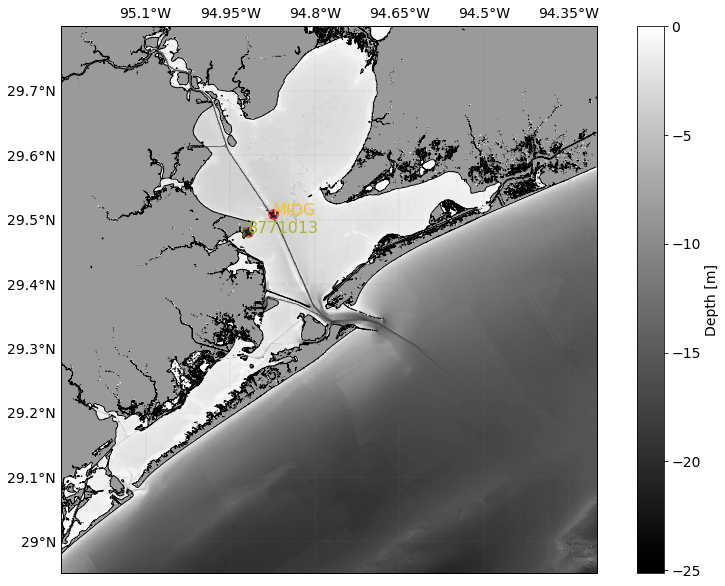

In [295]:
fig = plt.figure(figsize=(12, 8))# (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-95.25, -94.3, 28.95, 29.8], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
# ax.add_feature(land_10m, facecolor='0.8')
# ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'
ax.set_facecolor('0.8')
ax.pcolormesh(lon, lat, bathyo.mask, cmap=cmo.gray_r, vmin=0, vmax=3, transform=pc)
mappable = ax.pcolormesh(lon, lat, bathyo, cmap=cmo.gray, transform=pc)
ax.contour(lon, lat, bathyo.mask, 1, colors='k', linewidths=1, transform=pc)
cb = fig.colorbar(mappable)
cb.set_label('Depth [m]')

for buoy in buoys_used:
    for var in buoys[buoy]['vars']:
        if var == 'AirT [deg C]':
            continue
        if not df['2017-08-24':'2017-09-3'][buoy + ': ' + var].isnull().all():
            ax.plot(*buoys[buoy]['ll'], **plots[var], transform=pc, label=var, markersize=10)
    ax.text(*buoys[buoy]['ll'], buoy, transform=pc, fontsize=16, color=buoys[buoy]['color'])

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower right')   
fig.savefig('figures/map_wbathy.png', bbox_inches='tight', dpi=200)

KeyError: 'AtmPr [MB]'

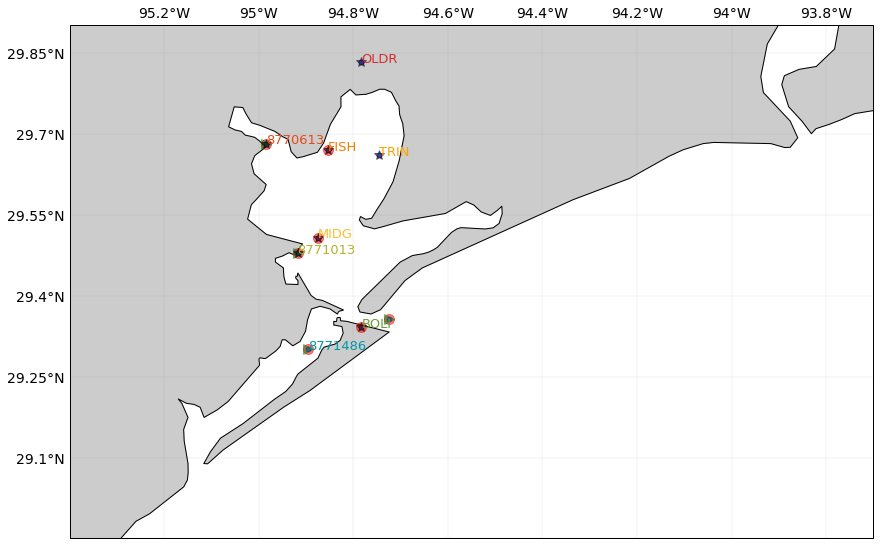

In [296]:
fig = plt.figure(figsize=(12, 8))# (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-95.4, -93.7, 28.95, 29.9], pc)
# ax.set_extent([-95.1, -94.5, 29.25, 29.85], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'

# mappable = ax.contourf(lon, lat, bathy, 40, cmap=cmo.deep_r, transform=pc)
# cb = fig.colorbar(mappable)

for buoy in buoys.keys():
    for var in buoys[buoy]['vars']:
        if var == 'AirT [deg C]':
            continue
        if not df['2017-08-24':'2017-09-3'][buoy + ': ' + var].isnull().all():
            ax.plot(*buoys[buoy]['ll'], **plots[var], transform=pc, label=var)
    ax.text(*buoys[buoy]['ll'], buoy, transform=pc, fontsize=13, color=buoys[buoy]['color'])

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower right')   
fig.savefig('figures/map_alldatalocs.png', bbox_inches='tight', dpi=200)

## Summary of ocean/met conditions

ADD PRECIPITATION TO PLOT

In [ ]:
# define short dataframe to simplify plotting
dsp = '2017-08-23'; dep = '2017-09-3'
ddt = 1
dfsh = df.copy()[::ddt][dsp:dep]
dfsh['idx'] = date2num(pd.to_datetime(dfsh.index).to_pydatetime())
width = 0.2

fig, axes = plt.subplots(5, 1, figsize=(16,18), sharex=True)

for buoy in buoys_used:
    
    ## Wind ##
    if 'East [m/s]' in buoys[buoy]['vars'] and not dfsh[buoy + ': East [m/s]'].isnull().all():
        axes[0].quiver(dfsh['idx'], np.zeros(len(dfsh)), dfsh[buoy + ': East [m/s]'], dfsh[buoy + ': North [m/s]'], 
                       headaxislength=0, headlength=0, width=width, units='y', scale_units='y', scale=1, 
                       color=buoys[buoy]['color'], label=buoy)
    
    ## Trinity River ##
    axes[1].plot(dfsh.index, dfsh['08067252: Trinity flow rate [m^3/s]'], color=buoys[buoy]['color'], lw=2)
    
    ## Sea Level ##
    if 'Water Level [m]' in buoys[buoy]['vars']:
        axes[2].plot(dfsh.index, dfsh[buoy + ': Water Level [m]'], label=buoy, color=buoys[buoy]['color'], lw=2)
        
    ## Salinity ##
    if 'Salinity' in buoys[buoy]['vars']:
        axes[3].plot(dfsh.index, dfsh[buoy + ': Salinity'], label=buoy, color=buoys[buoy]['color'], lw=2)
        axes[3].legend()
        
    ## Entrance along-channel velocity ##
    if 'Along [cm/s]' in buoys[buoy]['vars']:
#         axes[4].plot(dfsh.index, dfsh[buoy + ': Along [cm/s], depth 6.8 [m]'], label=buoy, color=buoys[buoy]['color'], lw=2)
        axes[4].plot(dfsh.index, dfsh[buoy + ': Along [cm/s], depth 5.79 [m]'], label=buoy, color=buoys[buoy]['color'], lw=2)
#         axes[4].plot(dfsh.index, dfsh[buoy + ': Along [cm/s], depth 7.8 [m]'], label=buoy, color=buoys[buoy]['color'], lw=2)

# labels
axes[0].set_ylabel('Wind [m/s]')
axes[1].set_ylabel('River flow rate [m^3/s]')
axes[2].set_ylabel('Water Level [m, MHW]')
axes[3].set_ylabel('Salinity')
axes[4].set_ylabel('Along-channel velocity [m/s]')

axes[0].set_ylim(-20,20)
axes[0].set_xlim(dfsh.index[0], dfsh.index[-1])
axes[0].hlines(0, dfsh.index[0], dfsh.index[-1], linewidth=1, linestyle=':')
axes[2].hlines(0, dfsh.index[0], dfsh.index[-1], linewidth=1, linestyle=':')
axes[4].hlines(0, dfsh.index[0], dfsh.index[-1], linewidth=1, linestyle=':')
for ax in axes:
    ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
    ax.grid(which='minor', lw=1, color='k', alpha=0.05)

minor = mpl.dates.HourLocator(byhour=np.arange(0,24,6))
ax.xaxis.set_minor_locator(minor)
major = mpl.dates.HourLocator(byhour=np.arange(0,24,24))
ax.xaxis.set_major_locator(major)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %d'))

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
# ax.legend(by_label.values(), by_label.keys(), loc='upper right')   

ax.set_xlabel('2017 [UTC]')

# plt.savefig('figures/ssh.pdf', bbox_inches='tight')

# 1. Calculate channel flux from Galveston Bay

We calculate the flux through Galveston channel, $Q_{ch}$, in two ways — one directly from data and one through conservation of salinity in the bay. The first should be good over time, regardless of the salinity state, but has large error because the data is at a single $x,y,z$ location and is assumed to be uniform across the whole channel. The second is only valid when there is salinity in the bay which is not true during the major flooding event. However, we use it to reduce the error in the first method.

We assume that any outflow from the West and East bays is insignificant.

## 1a. From current meter in channel

$\begin{align}
Q_{ch} &= \iint_A U_{ch}(t) \, dA  \\
~ &\approx U_{ch} \cdot A
\end{align}$

where the integral of the along-channel velocity, $U_{ch}$, of a cross-section of Galveston channel is approximated by the along-channel velocity at buoy `g06010` times the approximate cross-sectional area, width $W$ times depth $D$. Instead of estimating the cross-sectional area of the channel, we leave this constant as a parameter to be estimated by comparing with the salinity conservation method. This parameter will include errors in the method too.

In [566]:
# negative sign because original orientation is positive into the bay
Uch = -df['g06010: Along [cm/s], depth 7.8 [m]']/100.  # m/s
Uch = -df['smean']/100.  # m/s

## 1b. From salinity conservation

Conservation of salinity in Galveston Bay gives:

$
\begin{align}
\partial (S V)/\partial t &= S_{in}Q_{in} - S_{ch} Q_{ch} \\
\partial (S V)/\partial t &= - S_{ch} Q_{ch} \\
\Rightarrow Q_{ch} &= -\frac{1}{S_{ch}} \frac{\partial (S V)}{\partial t}
\end{align}
$

where the input salinity, $S_{in}$, is assumed to be fresh so $S_{in}=0$ and $S_{ch}$ is the channel salinity.

We have data from TWDB station BOLI to represent $S_{ch}$ but the resulting inflow calculation has a linear relationship with the salinity representation of the water in the bay, $S(t)$, so we need to treat this carefully in particular.

Rayson et al 2017 finds that the volume-averaged salinity along the bay tends to be located around 30km from the mouth of the bay, which is approximately where the TWDB MIDG station is located. This is shown in their Figure 3. Therefore, we use the MIDG station to represent the average salinity of the bay, $S(t)$.

Note that we include the main (middle part plus Trinity bay) and east bays of Galveston only for all calculations because previous work (Powell 2003, Rayson 2015) have shown connectivity between salinity in these two areas but limited mixing with the West Bay. We will not use the West Bay of Galveston for any calculation in this work.

The derivative term is calculated as follows, where the volume is approximated as the surface area times the average depth plus a representative sea surface height:

$
\begin{align}
    \frac{\partial (S V)}{\partial t} &= A \frac{\partial [S(H+\eta)]} {\partial t}.
\end{align}
$

We calculate this term for both of the bays (main and east).

Surface area of the bay is calculated using bathymetry of Galveston Bay as calculated in `bathy` notebook.

In [567]:
# Main bay surface area
Am = np.nansum(~np.isnan(bathym)*dx*dy)

# Full Galveston Bay
Afull = np.nansum(~np.isnan(bathy)*dx*dy)

# West Bay
Aw = np.nansum(~np.isnan(bathyw)*dx*dy)

# Average depth for main bays
Hm = -np.nanmean(bathym)

# Average depth for full galv bay
Hfull = -np.nanmean(bathy)
# Average depth for west bay
Hw = -np.nanmean(bathyw)


In [568]:
S = df['MIDG: Salinity']
Sch = df['BOLI: Salinity']

eta = df['8771013: Water Level [m]']#['2017-08-4':]  # m, for main bay
etaw = df['8771486: Water Level [m]']#['2017-08-4':]  # m, for dealing with west bay separately

# Main Bay
SV = Am*S*(eta + Hm)
dSVdt = SV.diff()/3600.  # divide by 3600 seconds for an hour frequency

# Full Galveston Bay, west bay salinity as BOLI (same as entrance channel)
SVfull1 = Am*S*(eta+Hm) + Aw*Sch*(etaw+Hw)
dSVfull1dt = SVfull1.diff()/3600.  # divide by 3600 seconds for an hour frequency

# Full Galveston Bay, west bay salinity as MIDG (same as main bay)
SVfull2 = Am*S*(eta+Hm) + Aw*S*(etaw+Hw)
dSVfull2dt = SVfull2.diff()/3600.  # divide by 3600 seconds for an hour frequency


We can then calculate the pre-storm channel flux as follows from salinity conservation:

In [569]:
# main bay
Qch1b = dSVdt/-Sch  # m^3/s

# full galv bay, west bay salinity as boli
Qch1bfull1 = dSVfull1dt/-Sch

# full galv bay, west bay salinity as midg
Qch1bfull2 = dSVfull2dt/-Sch

## Combining methods to get best $Q_{ch}$

Salinity conservation (method 1b) gives us a more robust calculation for the channel flux, but it isn't meaningful after the whole bay is fresh. Thus, we combine this with applying current data uniformly across the channel (method 1a) to get an improved estimate.

We seek a fixed constant to improve the comparison of $U_{ch}$ with Qout1b. So, we use a linear fit between the two functions over the time period before Hurricane Harvey, from July 1 through August 24th.

In [459]:
# # Uch = -df['g06010: Along [cm/s], depth 10.79 [m]']/100.  # m/s
# Qt = Qch1b

# dst1 = '2017-7-1'; det1 = '2017-8-24'
# # fs = [Qch1b, Qch1bfull1, Qch1bfull2]
# f = Qch1b
# # try splitting into ebb and flood for fit
# ind = (~Uch[dst1:det1].isnull()) & (~f[dst1:det1].isnull()).values
# indf = ind[Uch[dst1:det1] < 0]  # into the bay, flood tide, since switched sign already
# inde = ind[Uch[dst1:det1] >= 0]  # out of the bay, ebb tide
# Uf = Uch[dst1:det1][Uch[dst1:det1] < 0]
# Qf = Qt[dst1:det1][Uch[dst1:det1] < 0]
# Ue = Uch[dst1:det1][Uch[dst1:det1] >= 0]
# Qe = Qt[dst1:det1][Uch[dst1:det1] >= 0]
# pf = np.polyfit(Uf, Qf, 1)  # fit a straight line (order is 1)
# print(pf)
# pe = np.polyfit(Ue, Qe, 1)  # fit a straight line (order is 1)
# print(pe)

# fig, ax = plt.subplots(1,1)
# ax.plot(Uf, Qf, '.', ms=6)
# ax.plot(Uf, np.polyval(pf, Uf), 'm', lw=2)
# ax.plot(Ue, Qe, '.', ms=6, color='g')
# ax.plot(Ue, np.polyval(pe, Ue), 'y', lw=2)

# Qcht = Uch[dst1:det1]
# Qcht[Uch[dst1:det1] < 0] = Uf*pf[0]
# Qcht[Uch[dst1:det1] >= 0] = Ue*pe[0]
# # Qcht = Uf*pf[0]
# # Qcht[~Ue.isnull()] = Ue[~Ue.isnull()]*pe[0]  # m^3/s
# # Qcht

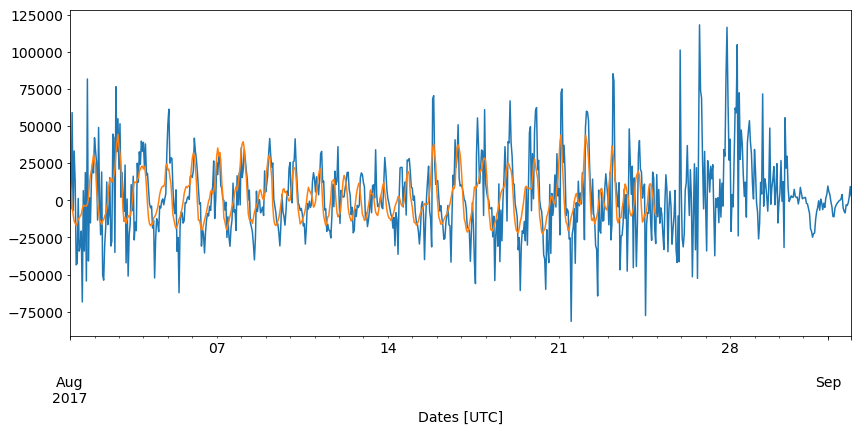

In [453]:
# dst2 = '2017-8-1'; det2 = '2017-9-1'

# fig, ax = plt.subplots(1, 1, figsize=(14,6), sharex=True, sharey=True)

# Qt[dst2:det2].plot(ax=ax, label='$Q^s_{ch}$')
# Qcht[dst2:det2].plot(label='improved, main', ax=ax)


In [454]:
# Qint = Qcht + dVdt
# Vincumt = Qint.cumsum()*3600  # multiply by time for integration, m^3
# Qbt = (Vincumt.loc['2017-8-24 23:00'] - Vincumt.loc['2017-8-1 00:00'])/1000**3
# print(Qbt)

# # print(Vincumt.loc['2017-8-24 23:00'] - Vincumt.loc['2017-8-1 00:00'])/1000**3


4.82419694774


[ 28910.29190427   -695.51689057]
[ 42307.81800499  -1365.92705514]
[ 35474.04407201  -1080.28108367]


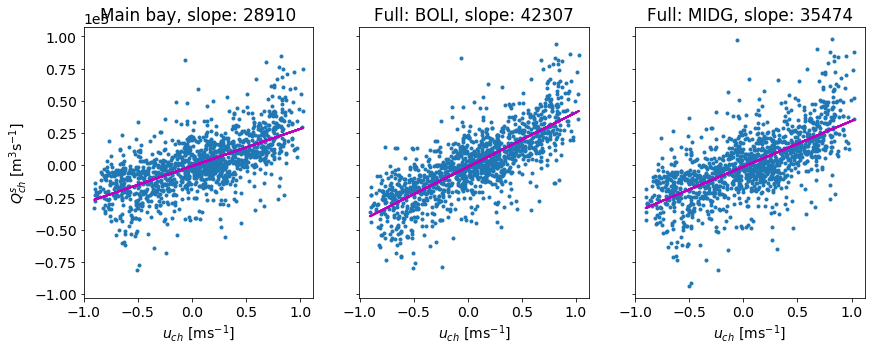

In [570]:
# Use linear fit to find relationship between measurements.
dst1 = '2017-7-1'; det1 = '2017-8-24'
fs = [Qch1b, Qch1bfull1, Qch1bfull2]
labels = ['Main bay', 'Full: BOLI', 'Full: MIDG']

# Demonstrate fit of line
fig, axes = plt.subplots(1,3,figsize=(14,5), sharey=True)

# loop through fits
ps = []
for ax, f, label in zip(axes, fs, labels):
    ind = (~Uch[dst1:det1].isnull()) & (~f[dst1:det1].isnull()).values
    p = np.polyfit(Uch[dst1:det1].loc[ind], f[dst1:det1].loc[ind], 1)  # fit a straight line (order is 1)
    ps.append(p)
    ax.plot(Uch[dst1:det1], f[dst1:det1], '.', ms=6)
    ax.plot(Uch[dst1:det1], np.polyval(p, Uch[dst1:det1]), 'm', lw=2)
    ax.ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
    ax.set_xlabel('$u_{ch}$ [ms$^{-1}$]')
    ax.set_title(label + ', slope: %3d' % p[0])
    print(p)
    
axes[0].set_ylabel('$Q^s_{ch}$ [m$^3$s$^{-1}$]')
fig.savefig('figures/linear_regression_Qch.pdf', bbox_inches='tight')

The improved channel flux is the the data-based method (1a) times the slope of the fit between the two methods. The constant factor (p[0]) represents the cross-sectional area of the channel at the location of the current meter times an error factor accounting for the fact that the channel flow is not uniform across the channel nor with depth.

Note that since the p[0] accounts for both channel area and an error factor, its units are m$^2$.

In [571]:
# this is now the improved flux calculation which applies during the storm too
# main bay
Qch = Uch*ps[0][0]  # m^3/s

# full: BOLI
Qchfull1 = Uch*ps[1][0]  # m^3/s

# full: MIDG
Qchfull2 = Uch*ps[2][0]

With this adjustment, the two approaches align well before the storm, as seen in the figure below. The salinity conservation approach (method 1b) does not give reasonable results once the bay is too fresh (around August 28th).

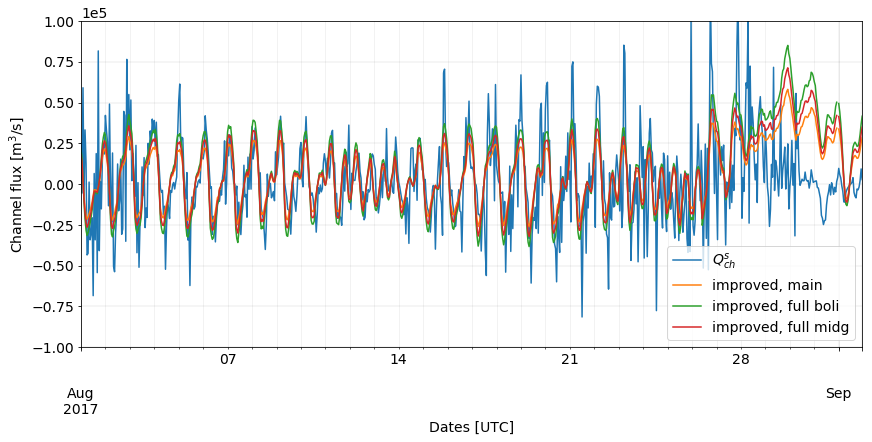

In [572]:
dst2 = '2017-8-1'; det2 = '2017-9-1'

fig, ax = plt.subplots(1, 1, figsize=(14,6), sharex=True, sharey=True)

Qch1b[dst2:det2].plot(ax=ax, label='$Q^s_{ch}$')
Qch[dst2:det2].plot(label='improved, main', ax=ax)
Qchfull1[dst2:det2].plot(label='improved, full boli', ax=ax)
Qchfull2[dst2:det2].plot(label='improved, full midg', ax=ax)
ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
ax.grid(which='minor', lw=1, color='k', alpha=0.05)
    
ax.legend()
ax.set_ylabel('Channel flux [m$^3$/s]')
ax.set_ylim(-1e5, 1e5)
ax.ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
plt.savefig('figures/channel_flux_improved.pdf', bbox_inches='tight')

This number is the equivalent area of the channel cross-section — it is the area times a factor to account for errors in assuming a constant along-channel velocity across the channel and with depth.

The cross-sectional area is approximately:

In [573]:
W = 2500  # meters, calculated with length tool in google earth

D = (250*22 + 325*34 + 1050*45 + 425*35 + 50*24 + 100*17 + 300*1)/2500  # feet
D /= 3.28084  # meters
W*D  # m^2

24955.499201424027

meaning that the equivalent area is

In [574]:
[print(p[0]/(W*D)) for p in ps];

1.15847379653
1.69533046258
1.42149206416


times the area of the channel there and therefore is in the right ballpark.

# 2. Calculate inflow to Galveston Bay

For this we use a control volume of Galveston Bay with the previously-calculated function for $Q_{ch}$

$\begin{align}
\partial V/\partial t &= Q_{in} - Q_{ch} ~~~~~~~~(1) \\
\Rightarrow Q_{in}(t) &= Q_{ch}(t) + \partial V/\partial t
\end{align}$

where $V(t)$ is the volume of Galveston Bay, $Q_{in}(t)$ is the water input to Galveston Bay, and $Q_{ch}(t)$ is the flux in Galveston Bay channel.

## 2a. Calculate volume of bay in time

Assuming that any change in x/y area of the bay due to flooding is limited, we have the following:

$\begin{align}
\partial V/\partial t &= \partial /\partial t \left(\iiint dxdydz\right) \\
~ &= \partial /\partial t \left(\iint \int_{z=h}^{0} dzdxdy + \iint \int_{z=0}^{\eta} dzdxdy\right) \\
~ &= \partial /\partial t \left(\iint \int_{z=h}^{0} dzdxdy\right) + \partial /\partial t \left(\iint\int_{z=0}^{\eta} dzdxdy\right) \\
~ &= \partial /\partial t \left(\iint\int_{z=0}^{\eta} dzdxdy\right) \\
~ &= A \partial /\partial t \int_{z=0}^{\eta} dz \\
~ &= A \partial \eta/\partial t
\end{align}$

We use the sea level at station 8771013 in the middle of the main bay to represent the sea level in both the main and east bays.

In [575]:
# sea level at buoy 8771013 for main bay
detadt = eta.diff()/3600.  # divide by 3600 seconds for an hour frequency
dVdt = Am * detadt

# sea level at buoy 8771341 for west bay
detawdt = etaw.diff()/3600.  # divide by 3600 seconds for an hour frequency
dVwdt = Aw * detawdt

## $Q_{in}$

Now we can make the final calculation.

In [576]:
# main bay
Qin = Qch + dVdt

# full bay, BOLI
Qinfull1 = Qchfull1 + dVdt + dVwdt

# full bay, MIDG
Qinfull2 = Qchfull2 + dVdt + dVwdt

The influx of water looks reasonable during the storm, as seen in the figure below.

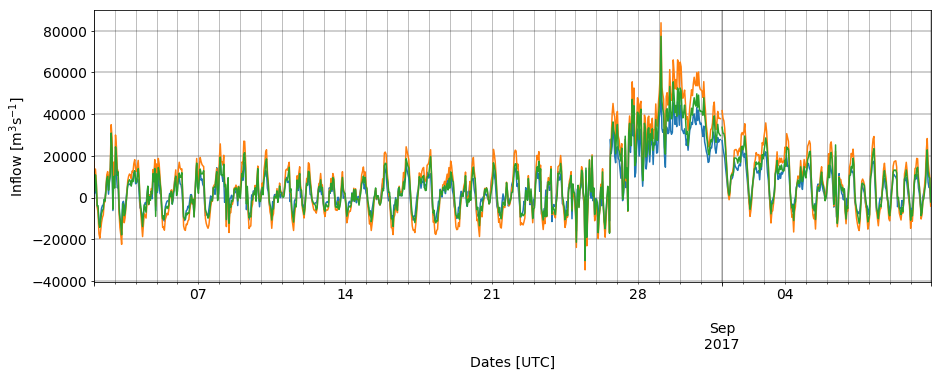

In [577]:
Qin['2017-8-2':'2017-9-10'].plot(figsize=(15,5), grid=True)
Qinfull1['2017-8-2':'2017-9-10'].plot(figsize=(15,5), grid=True)
Qinfull2['2017-8-2':'2017-9-10'].plot(figsize=(15,5), grid=True)
# (Qin['2017-8-20':'2017-9-10'].rolling(center=True, window=10).mean()).plot(figsize=(15,5), grid=True)
# Qch['2017-8-20':'2017-9-10'].plot(grid=True)
plt.grid(which='major', lw=1.5, color='k', alpha=0.25)
plt.grid(which='minor', lw=1, color='k', alpha=0.25)
plt.ylabel('Inflow [m$^3$s$^{-1}$]')
plt.savefig('figures/Qin.pdf', bbox_inches='tight')

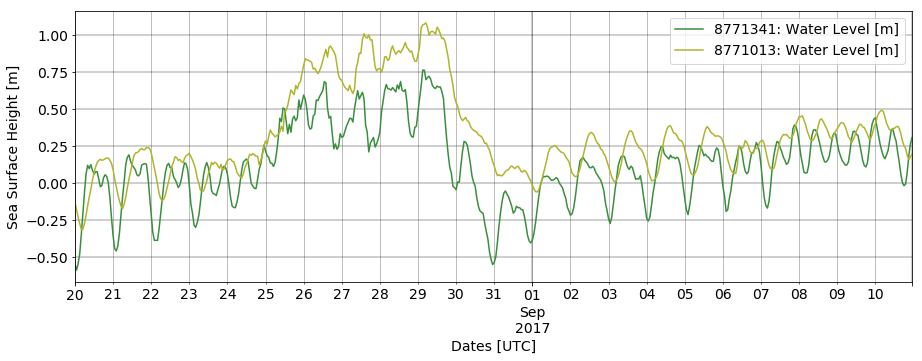

In [196]:
df['8771341: Water Level [m]']['2017-8-20':'2017-9-10'].plot(figsize=(15,5), legend=True, color=buoys['8771341']['color'])
df['8771013: Water Level [m]']['2017-8-20':'2017-9-10'].plot(figsize=(15,5), legend=True, color=buoys['8771013']['color'])
plt.grid(which='major', lw=1.5, color='k', alpha=0.25)
plt.grid(which='minor', lw=1, color='k', alpha=0.25)
plt.ylabel('Sea Surface Height [m]')
plt.savefig('figures/etas.pdf', bbox_inches='tight')

COMPARE WITH MISSISSIPPI LEVEL FLOW

# Inflow sum

Use cumulative sums to examine inflow since signal is wiggly.

MAKE SURE WIGGLES MATCH HEAD SET UP IN BAY TO SHOW THAT TIDE (AND STORM SURGE?) IS MODULATING SIGNAL

In [578]:
Vincum = Qin.cumsum()*3600  # multiply by time for integration, m^3
Vincumfull1 = Qinfull1.cumsum()*3600  # multiply by time for integration, m^3
Vincumfull2 = Qinfull2.cumsum()*3600  # multiply by time for integration, m^3

## Filter out neap-spring cycle

The neap spring fortnightly cycle is a regular signal in the inflow but is separate from what we want to examine. So, we will remove it.

DO I NEED TO REMOVE IT FROM THE FLOODING SIGNAL? IF SO THEN HOW?

In [579]:
# # filtered signals
# Vroll = Vincum.rolling(window=24*15, center=False, min_periods=10*24).mean()
# Vrollfull1 = Vincumfull1.rolling(window=24*15, center=False, min_periods=10*24).mean()
# Vrollfull2 = Vincumfull2.rolling(window=24*15, center=False, min_periods=10*24).mean()

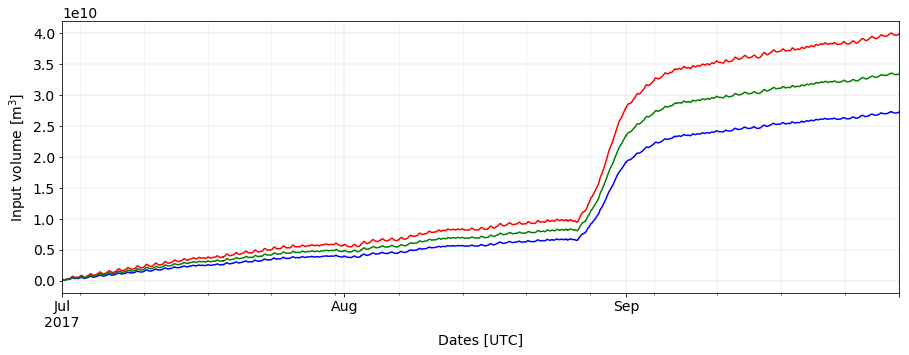

In [580]:
dst3 = '2017-7-1'; den3 =  '2017-9-30'
ax = Vincum[dst3:den3].plot(figsize=(15,5), grid=True, color='b')
Vincumfull1[dst3:den3].plot(color='r')
Vincumfull2[dst3:den3].plot(color='g')
ax.set_ylabel('Input volume [m$^3$]')

# Vroll[dst3:den3].plot(color='b', ls='--')
# Vrollfull1[dst3:den3].plot(color='r', ls='--')
# Vrollfull2[dst3:den3].plot(color='g', ls='--')


# dpre = '2017-8-1'  # start of pre-storm
# dstorm = '2017-8-26 12:00'  # start of storm
# dpost = '2017-9-2 00:00'  # post storm
# # ax.vlines(dstorm, 0,3e10)
# # ax.vlines(dpost, 0,3e10)

ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
ax.grid(which='minor', lw=1, color='k', alpha=0.05)


In [327]:
df.columns

Index(['08078000: Flow rate [m^3/s]', '08077600: Flow rate [m^3/s]',
       '08074500: Flow rate [m^3/s]', '08068500: Flow rate [m^3/s]',
       '08068090: Flow rate [m^3/s]', '08070500: Flow rate [m^3/s]',
       '08071000: Flow rate [m^3/s]', '08070200: Flow rate [m^3/s]',
       '08071280: Flow rate [m^3/s]', '08067252: Flow rate [m^3/s]',
       ...
       'g06010: Along [cm/s], depth 9.81 [m]',
       'g06010: Across [cm/s], depth 9.81 [m]',
       'g06010: Along [cm/s], depth 10.79 [m]',
       'g06010: Across [cm/s], depth 10.79 [m]', '08067000: Rain [cm]',
       '08077650: Rain [cm]', '08073600: Rain [cm]',
       'BOLI: Depth [m], smoothed', 'BOLI: Density [kg/m^3]',
       'BOLI: Depth [m], corrected'],
      dtype='object', length=113)

## Inflow before storm (check)

Add up in flow before storm and compare with TWDB watershed calculation.

In [80]:
# # inflow from 8/1 through 8/24
# Qb = (Vroll.loc['2017-8-24 23:00'] - Vroll.loc['2017-8-1 00:00'])/1000**3
# Qbfull1 = (Vrollfull1.loc['2017-8-24 23:00'] - Vrollfull1.loc['2017-8-1 00:00'])/1000**3
# Qbfull2 = (Vrollfull2.loc['2017-8-24 23:00'] - Vrollfull2.loc['2017-8-1 00:00'])/1000**3
# print(Qb, Qbfull2, Qbfull2)

In [581]:
# inflow from 8/1 through 8/24
Qb = (Vincum.loc['2017-8-24 23:00'] - Vincum.loc['2017-8-1 00:00'])/1000**3
Qbfull1 = (Vincumfull1.loc['2017-8-24 23:00'] - Vincumfull1.loc['2017-8-1 00:00'])/1000**3
Qbfull2 = (Vincumfull2.loc['2017-8-24 23:00'] - Vincumfull2.loc['2017-8-1 00:00'])/1000**3
print(Qb, Qbfull2, Qbfull2)

2.76373135905 3.43859654138 3.43859654138


In [63]:
# from Nelun for TWDB watershed calculation
infg = pd.read_csv('drive_data/daily_gauged_galv_1Aug_30Sep2017.csv', parse_dates=True, index_col=0)['sum_afd']
convert = 0.0142764  # 1 acre-foot per day = 0.0142764 m^3/s
infg *= convert
infug = pd.read_csv('drive_data/fresh_in_modelled_galv_1aug2017_to_30sep2017.txt', parse_dates=True, index_col=0, skiprows=1, header=None, names=['Dates', 'ungauged'])
infug *= convert
# total inflow is sum of ungauged and gauged inflow
inf = infug['ungauged'] + infg

In [29]:
# multiply by seconds per day to get volume
QTWDB = (inf['2017-8-1':'2017-8-24']*86400).sum()/1000**3
print(QTWDB)

0.9605147935980671


These are very close!!!

# Volume input to bay

We compare the time periods to decide what flooding time period to average over (below). 

Based on this, we define the flooding time period to be from 2017-8-26 16:00 through 2017-9-2.

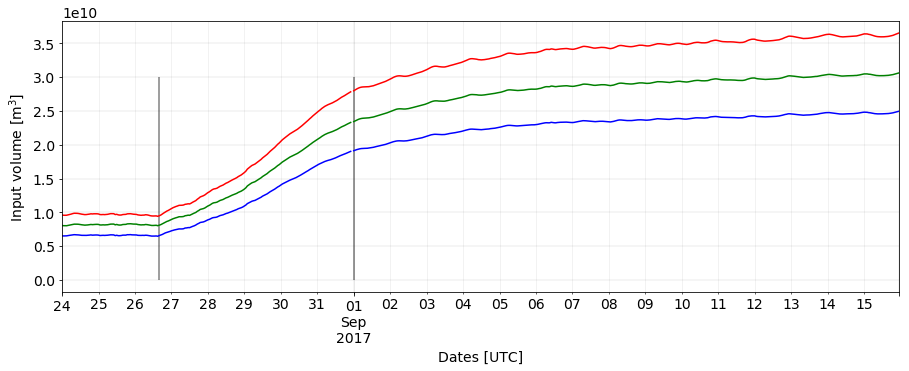

In [582]:
dst4 = '2017-8-24'; den4 =  '2017-9-15'
ax = Vincum[dst4:den4].plot(figsize=(15,5), grid=True, color='b')
Vincumfull1[dst4:den4].plot(color='r')
Vincumfull2[dst4:den4].plot(color='g')
ax.set_ylabel('Input volume [m$^3$]')


# dpre = '2017-8-1'  # start of pre-storm
dstorm = '2017-8-26 16:00'  # start of storm
dpost = '2017-9-1  00:00' # '2017-9-5 00:00'  # post storm
ax.vlines(dstorm, 0,3e10, alpha=0.5)
ax.vlines(dpost, 0,3e10, alpha=0.5)

ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
ax.grid(which='minor', lw=1, color='k', alpha=0.05)


This gives a total input flow of:

In [583]:
Vin = (Vincum[dpost] - Vincum[dstorm])/1000**3  # km^3
Vinfull1 = (Vincumfull1[dpost] - Vincumfull1[dstorm])/1000**3  # km^3
Vinfull2 = (Vincumfull2[dpost] - Vincumfull2[dstorm])/1000**3  # km^3
print(Vin, Vinfull1, Vinfull2)

12.5525155919 18.4868348342 15.3265739661


In [395]:
Vin = (Vincum[dpost] - Vincum[dstorm])/1000**3  # km^3
Vinfull1 = (Vincumfull1[dpost] - Vincumfull1[dstorm])/1000**3  # km^3
Vinfull2 = (Vincumfull2[dpost] - Vincumfull2[dstorm])/1000**3  # km^3
print(Vin, Vinfull1, Vinfull2)

12.6729598613 18.6362861013 15.4975059289


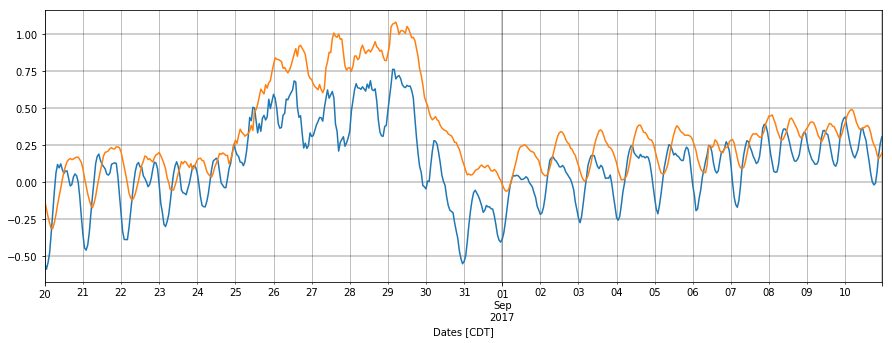

In [165]:
df['8771341: Water Level [m]']['2017-8-20':'2017-9-10'].plot(figsize=(15,5))
df['8771013: Water Level [m]']['2017-8-20':'2017-9-10'].plot(figsize=(15,5))
plt.grid(which='major', lw=1.5, color='k', alpha=0.25)
plt.grid(which='minor', lw=1, color='k', alpha=0.25)
# dst = '2017-8-26 16:00'; den = '2017-9-2'


## Compare with volume of Galveston Bay

Average depth of Galveston Bay:

In [400]:
# Galveston Bay volume (main and east bays)
Vm = (Am*Hm)/1000**3  # km^3
print(Vm)

# with west bay too
Vfull = (Afull*Hfull)/1000**3  # km^3
print(Vfull)

2.21603712194
2.61561758792


For reference, the west bay surface area and volume are (which are not used in the calculations):

In [397]:
# west bay surface area
bathyw = np.load(base + 'bathy_galv_west.npz')['bathy']
Aw = np.nansum(~np.isnan(bathyw)*dx*dy)
# Average depth for main and East bays
Hw = -(np.nansum(bathyw))/((~np.isnan(bathyw)).sum())
print(Aw/1000**3, (Aw*Hw)/1000**3)  # km^2, km^3

0.301073312753 0.399580465978


This means that the flood water could fill the bay approximately:

In [402]:
print(Vin/Vm, Vin/Vfull)

5.71874890352 4.84511188478


In [486]:
print(Vin/Vm, Vin/Vfull)

5.4661189557 4.63107549618


In [588]:
print(Vin/Vm, Vinfull1/Vfull)

5.66439770688 7.06786608242


times.

## Compare with the precipitation estimates over Texas

## Compare our choice of timing for integrating flood waters with other sources